In [1]:
pip install google-play-scraper

Note: you may need to restart the kernel to use updated packages.


In [2]:
#!pip install -qq google_play_scraper
!pip install -q transformers

In [3]:
import pandas as pd
import numpy as np
from google_play_scraper import app, Sort, reviews_all
import plotly.express as px

In [4]:
# Reviews_all Scrape the reviewid, username, content etc from the app page into a JSON format
Bitmama = reviews_all('com.bitmama.bitmama',sleep_milliseconds=0, lang='en', country='NG', sort=Sort.NEWEST)

In [5]:
Bitmama

[{'reviewId': 'b1a2662a-8768-47b8-b0b1-ed8aa86ed0fc',
  'userName': 'unknown unknown',
  'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjWbQfLkT5wjbnh5hpolHyyxu1dK3OLhcITn3oLjOnSaeNIegOKf',
  'content': 'I regret using them and making depending on them...since yesterday they have acting skeptical',
  'score': 1,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '1.1.113',
  'at': datetime.datetime(2024, 12, 26, 10, 50, 30),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '1.1.113'},
 {'reviewId': '2552399d-1a27-416b-95ee-2c0f5a36f82e',
  'userName': 'Mary Orauno',
  'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocIP2dKSoksQMODKVbVhPmdJbT4VloOTo8F_b14qwpf5PUT8pg=mo',
  'content': "You people are frustrating. Why hold on to the money my husband sent for his children to celebrate Christmas. Please release the money for christ sake . Since yesterday. Your customer care kamsi told me to wait for 4 hours and it's been hours and she is not responding to me 

In [6]:
# convert the json data into a dataframe
Bitmama_df = pd.json_normalize(Bitmama)

In [7]:
Bitmama_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,b1a2662a-8768-47b8-b0b1-ed8aa86ed0fc,unknown unknown,https://play-lh.googleusercontent.com/a-/ALV-U...,I regret using them and making depending on th...,1,0,1.1.113,2024-12-26 10:50:30,None,NaT,1.1.113
1,2552399d-1a27-416b-95ee-2c0f5a36f82e,Mary Orauno,https://play-lh.googleusercontent.com/a/ACg8oc...,You people are frustrating. Why hold on to the...,1,0,1.1.86,2024-12-25 07:29:44,None,NaT,1.1.86
2,752a8656-7384-456b-b18e-00c42fbf9d0b,Progression Harrison,https://play-lh.googleusercontent.com/a/ACg8oc...,Using Bitmama's services has been nothing but ...,1,1,1.1.113,2024-12-12 10:23:02,None,NaT,1.1.113
3,ad1fe6f6-f75a-4423-9cbb-f368e0b43729,Isa Bala,https://play-lh.googleusercontent.com/a-/ALV-U...,I have sent celo dollar to the wallet of this ...,3,0,1.1.113,2024-12-11 09:25:07,None,NaT,1.1.113
4,53b3a0d5-b042-42f6-affc-980d402dec91,Dedon Bigy,https://play-lh.googleusercontent.com/a-/ALV-U...,Good project 🎉🎉,5,0,None,2024-12-10 08:53:47,None,NaT,None


In [8]:
Bitmama_df.shape

(486, 11)

# Sentiment Analysis

In [10]:
#pip install tensorFlow


In [11]:
from transformers import pipeline

# Save the model locally
model_name = "siebert/sentiment-roberta-large-english"
save_path = r"Desktop/Click-on Kd/save_path"  # Directory to save the model

In [14]:
# Load the pipeline and save the model
sentiment_analysis = pipeline("sentiment-analysis", model=model_name)
sentiment_analysis.save_pretrained(save_path)

# Reuse the saved model
sentiment_analysis_reuse = pipeline("sentiment-analysis", model=save_path)



Device set to use cpu
Device set to use cpu


In [15]:
# Test the reused model 
# play with the parameter and see if it works

result = sentiment_analysis_reuse("Maryam keep the same positve energy and bad")
print(result)

[{'label': 'POSITIVE', 'score': 0.9301064014434814}]


In [16]:
#removing wildcharacter and cleaning the content column by casting to a str
Bitmama_df['content_new']= Bitmama_df['content'].astype('str')

In [17]:
Bitmama_df['result'] =Bitmama_df['content_new'].apply(lambda x: sentiment_analysis_reuse(x))

In [18]:
Bitmama_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_new,result
0,b1a2662a-8768-47b8-b0b1-ed8aa86ed0fc,unknown unknown,https://play-lh.googleusercontent.com/a-/ALV-U...,I regret using them and making depending on th...,1,0,1.1.113,2024-12-26 10:50:30,None,NaT,1.1.113,I regret using them and making depending on th...,"[{'label': 'NEGATIVE', 'score': 0.999498605728..."
1,2552399d-1a27-416b-95ee-2c0f5a36f82e,Mary Orauno,https://play-lh.googleusercontent.com/a/ACg8oc...,You people are frustrating. Why hold on to the...,1,0,1.1.86,2024-12-25 07:29:44,None,NaT,1.1.86,You people are frustrating. Why hold on to the...,"[{'label': 'NEGATIVE', 'score': 0.999495148658..."
2,752a8656-7384-456b-b18e-00c42fbf9d0b,Progression Harrison,https://play-lh.googleusercontent.com/a/ACg8oc...,Using Bitmama's services has been nothing but ...,1,1,1.1.113,2024-12-12 10:23:02,None,NaT,1.1.113,Using Bitmama's services has been nothing but ...,"[{'label': 'NEGATIVE', 'score': 0.999506711959..."
3,ad1fe6f6-f75a-4423-9cbb-f368e0b43729,Isa Bala,https://play-lh.googleusercontent.com/a-/ALV-U...,I have sent celo dollar to the wallet of this ...,3,0,1.1.113,2024-12-11 09:25:07,None,NaT,1.1.113,I have sent celo dollar to the wallet of this ...,"[{'label': 'NEGATIVE', 'score': 0.999468386173..."
4,53b3a0d5-b042-42f6-affc-980d402dec91,Dedon Bigy,https://play-lh.googleusercontent.com/a-/ALV-U...,Good project 🎉🎉,5,0,None,2024-12-10 08:53:47,None,NaT,None,Good project 🎉🎉,"[{'label': 'POSITIVE', 'score': 0.998774349689..."


In [19]:
# spliting the result into sentiment and score
Bitmama_df['sentiment'] = Bitmama_df['result'].apply(lambda x: (x[0]['label']))
Bitmama_df['score'] =Bitmama_df['result'].apply(lambda x: (x[0]['score']))

In [20]:
Bitmama_df[['content','score','sentiment']]

,content,score,sentiment
0,I regret using them and making depending on th...,0.999499,NEGATIVE
1,You people are frustrating. Why hold on to the...,0.999495,NEGATIVE
2,Using Bitmama's services has been nothing but ...,0.999507,NEGATIVE
3,I have sent celo dollar to the wallet of this ...,0.999468,NEGATIVE
4,Good project 🎉🎉,0.998774,POSITIVE
...,...,...,...
481,Stupid app,0.999476,NEGATIVE
482,Bad app wast of time,0.999494,NEGATIVE
483,Even if you waste your Mb to download don't wa...,0.999492,NEGATIVE
484,This app is not market ready. It looks hurried...,0.999505,NEGATIVE


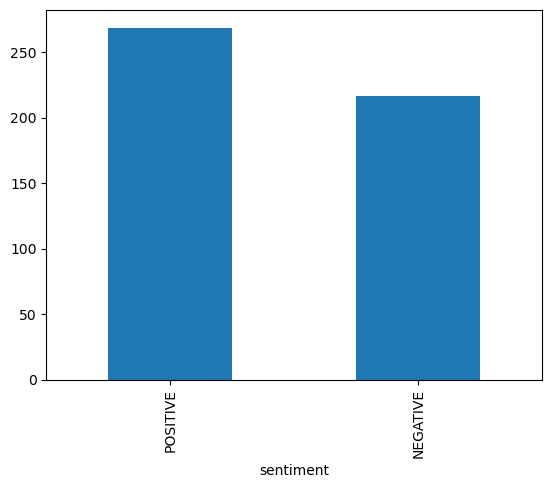

In [21]:
Bitmama_df['sentiment'].value_counts().plot(kind='bar');

# Topic modeling

In [23]:
#generate a series for the reviews

feature_google=Bitmama_df['content']
print(feature_google.size)
feature_google.head()

486


0    I regret using them and making depending on th...
1    You people are frustrating. Why hold on to the...
2    Using Bitmama's services has been nothing but ...
3    I have sent celo dollar to the wallet of this ...
4                                      Good project 🎉🎉
Name: content, dtype: object

In [24]:
!pip install textblob


In [25]:
# Import the necessary libraries
from textblob import TextBlob


# Define a function to translate the text to English
def translate_to_en(text):
    blob = TextBlob(str(text))
    try:
        return str(blob.translate(to='en'))
    except:
        return str(text)

# Apply the translate_to_en function to the 'review' column of the DataFrame
feature_google = feature_google.apply(translate_to_en)

# Print the top 5 rows of the DataFrame with the new 'review_en' column
print(feature_google.head())


0    I regret using them and making depending on th...
1    You people are frustrating. Why hold on to the...
2    Using Bitmama's services has been nothing but ...
3    I have sent celo dollar to the wallet of this ...
4                                      Good project 🎉🎉
Name: content, dtype: object


In [26]:
pip install bertopic

Note: you may need to restart the kernel to use updated packages.


In [33]:
from bertopic import BERTopic

topic_model = BERTopic()
topics, probs = topic_model.fit_transform(feature_google.
                                   astype(str))

In [34]:
topic_model.get_topic_info().head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,45,-1_app_and_it_the,"[app, and, it, the, to, exchange, just, very, ...",[The password recovery on this app is the most...
1,0,216,0_to_the_is_and,"[to, the, is, and, my, this, app, you, money, of]",[It been over 14 hours i made a transaction fr...
2,1,67,1_app_good_and_very,"[app, good, and, very, the, easy, use, love, b...","[I love the app, and i would love to really co..."
3,2,37,2_code_to_my_cant,"[code, to, my, cant, 2fa, login, the, app, num...",[I have been unable to receive the verificatio...
4,3,32,3_good_nice_sweet_excellent,"[good, nice, sweet, excellent, satisfaction, o...","[Good 👍, Good, Nice and good]"
5,4,32,4_customer_service_great_their,"[customer, service, great, their, support, the...","[The best platform ever indeed, the best custo..."
6,5,24,5_app_stopping_it_the,"[app, stopping, it, the, keeps, again, over, o...",[I installed this app today I actually registe...
7,6,19,6_verification_service_and_so,"[verification, service, and, so, their, its, t...",[Had issues with verification and the customer...
8,7,14,7_app_terrible_the_download,"[app, terrible, the, download, useless, previo...",[I feel confident after I successfully downloa...


In [35]:
Bitmama_df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion', 'content_new', 'result', 'sentiment'],
      dtype='object')

In [36]:
# the data to excel
output_file = 'playstore_reviews.xlsx'
Bitmama_df.to_excel(output_file, index=False)

In [37]:
pip install mysql-connector-python --upgrade

Note: you may need to restart the kernel to use updated packages.


# ETL Code

In [39]:
dataframe=Bitmama_df

In [40]:
data = [tuple(row) for row in Bitmama_df.to_numpy()]

In [41]:
# Check if any column contains lists
for col in dataframe.columns:
    if dataframe[col].apply(lambda x: isinstance(x, list)).any():
        print(f"Column '{col}' contains list values.")


Column 'result' contains list values.


In [42]:
# Flatten lists into comma-separated strings
for col in dataframe.columns:
    dataframe[col] = dataframe[col].apply(
        lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x
    )


In [43]:
# Replace NaN with None
dataframe = dataframe.where(pd.notnull(dataframe), None)


In [44]:
import mysql.connector
import pandas as pd

DB_CONFIG = {
     'host': 'localhost',
    'user': 'root',
    'password': '',
    'database': 'playstore_reviews_'
}

def create_connection():
    try:
        conn = mysql.connector.connect(**DB_CONFIG)
        print("Connected to MySQL Database!")
        return conn
    except mysql.connector.Error as err:
        if err.errno == 1049:
            print(f"Database '{DB_CONFIG['database']}' does not exist. Creating it...")
            temp_config = DB_CONFIG.copy()
            temp_config.pop('database')
            conn = mysql.connector.connect(**temp_config)
            cursor = conn.cursor()
            cursor.execute(f"CREATE DATABASE {DB_CONFIG['database']}")
            print(f"Database '{DB_CONFIG['database']}' created successfully!")
            cursor.close()
            conn.close()
            conn = mysql.connector.connect(**DB_CONFIG)
            return conn
        else:
            print(f"Error: {err}")
            return None

def infer_mysql_data_type(dtype, column_name=None):
    if column_name == "reviewId":  # Ensure `reviewId` is always VARCHAR(255)
        return "VARCHAR(255)"
    elif pd.api.types.is_integer_dtype(dtype):
        return "INT"
    elif pd.api.types.is_float_dtype(dtype):
        return "FLOAT"
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return "DATETIME"
    else:
        return "TEXT"

def create_table_from_dataframe(cursor, df, table_name):
    columns_with_types = []
    for col in df.columns:
        dtype = df[col].dtype
        mysql_type = infer_mysql_data_type(dtype, column_name=col)
        columns_with_types.append(f"`{col}` {mysql_type}")

    create_table_query = f"""
    CREATE TABLE IF NOT EXISTS `{table_name}` (
        {", ".join(columns_with_types)},
        PRIMARY KEY (`reviewId`)
    )
    """
    cursor.execute(create_table_query)
    print(f"Table `{table_name}` created successfully!")

def insert_data_from_dataframe(cursor, conn, df, table_name):
    columns = ", ".join([f"`{col}`" for col in df.columns])
    placeholders = ", ".join(["%s"] * len(df.columns))
    insert_query = f"""
    INSERT INTO `{table_name}` ({columns})
    VALUES ({placeholders})
    ON DUPLICATE KEY UPDATE {", ".join([f"`{col}` = VALUES(`{col}`)" for col in df.columns])}
    """
    
    for col in df.columns:
        df[col] = df[col].apply(
            lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x
        )
    df = df.where(pd.notnull(df), None)

    data = [tuple(row) for row in df.to_numpy()]
    cursor.executemany(insert_query, data)
    conn.commit()
    print(f"{cursor.rowcount} rows inserted/updated successfully!")

def main():
    conn = create_connection()
    if conn is None:
        print("Failed to connect to the database. Exiting.")
        return

    cursor = conn.cursor()

    global dataframe
    if 'dataframe' not in globals():
        print("DataFrame `dataframe` is not defined. Exiting.")
        return

    datetime_columns = ['at', 'repliedAt']
    for col in datetime_columns:
        if col in dataframe.columns:
            dataframe[col] = pd.to_datetime(dataframe[col], errors='coerce')

    table_name = "playstore_reviews_"
    create_table_from_dataframe(cursor, dataframe, table_name)
    insert_data_from_dataframe(cursor, conn, dataframe, table_name)

    cursor.close()
    conn.close()
    print("MySQL connection closed.")

if __name__ == "__main__":
    dataframe = dataframe

    main()

Database 'playstore_reviews_' does not exist. Creating it...
Database 'playstore_reviews_' created successfully!
Table `playstore_reviews_` created successfully!
486 rows inserted/updated successfully!
MySQL connection closed.
